# Neural Net from scratch
I watched a short clip from Lex Fridman interviewing Andrej Karpathy, so here I am building a neural network from scratch, putting in time towards my 10000 hours. By the time I reach this 10000 hours number, I may no longer be :)

## Forward Prop

In [42]:
import numpy as np

num_inputs = 2
num_hidden_layers = 2
num_nodes_hidden_layer_1 = 6
num_nodes_hidden_layer_2 = 4
num_outputs = 1

# weight matrix between the inputs and the first hidden layer
# If our first hidden layer has 6 units
# we'd need to produce a calculation for each hidden unit,
# IE the result of the dot product of the weight matrix for this hidden layer and the input vector should be
# a 6 x 1 vector.
# what we feed that matrix is our input layer:
# the dimension of our input is 2 x 1, but since we also need to add a bias unit,
# for convenience we add the bias into the input vector as a 1 - 
# [
#    1,
#    x1,
#    x2
# ]
# Now we feed the weight matrix a (3 x 1) input vector so we get a 6 x 1 activations vector, hence
# Our weight matrix needs to be 6 x 3 :
# (6 x 3) dot (3 x 1) = 6 x 1

# for the sake of verifying calculation, for now our weight matrices would be 1s
# later we will randomize them
hidden_layer_1_weight_matrix = np.ones((num_nodes_hidden_layer_1, num_inputs + 1))

print(f'Hidden Layer 1 matrix: {hidden_layer_1_weight_matrix.shape}\n')
print(hidden_layer_1_weight_matrix)


print()
# Similarly, we need to feed this  6 x 1 activations vector plus a bias unit(so 7 x 1 vector)
# into the weight matrix for the second hidden layer
# The second hidden layer has 4 nodes, hence needs to produce a 4 x 1 activations vector, so
# The weight matrix for the second hidden layer would be 4 x 7: (4x7) dot (7x1) = 4x1

hidden_layer_2_weight_matrix = np.ones((num_nodes_hidden_layer_2, num_nodes_hidden_layer_1 + 1))

print(f'Hidden Layer 2 matrix: {hidden_layer_2_weight_matrix.shape}\n')
print(hidden_layer_2_weight_matrix)

print()
# And again, we need to feed the 4x1 activations vector plus a bias unit(so 5x1)
# into the weight matrix for the output layer
# The output layer is a singled node (1, 1), so
# The weight matrix for the output layer would be (1x5)
# (1x5)dot(5x1) = (1x1)

output_layer_weight_matrix = np.ones((num_outputs, num_nodes_hidden_layer_2 + 1))

print(f'Output Layer matrix: {output_layer_weight_matrix.shape}\n')
print(output_layer_weight_matrix)



Hidden Layer 1 matrix: (6, 3)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Hidden Layer 2 matrix: (4, 7)

[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]

Output Layer matrix: (1, 5)

[[1. 1. 1. 1. 1.]]


### Actual Forward Prop
##### Now that we have all the matrices, let's see if we can get a sample input vector to turn into output.
##### We will feed a forward prop function our input vector(2x1) and we should end up with a 1x1 output

In [43]:
def forward_prop(input_vectors, hidden_layer_1_weight_matrix, hidden_layer_2_weight_matrix, 
                 output_layer_weight_matrix):
    # input shape:
    # [x11, x21, x31, ..., xN1],
    # [x12, x22, x32, ..., xN2]
    num_records = input_vectors.shape[1]
    # add the bias unit to the input
    input_vectors_plus_bias = np.vstack([np.ones(num_records), input_vectors])
    print(input_vectors_plus_bias.shape)
    print(input_vectors_plus_bias)
    layer_1_activations_vectors = np.dot(hidden_layer_1_weight_matrix, input_vectors_plus_bias)
    
    print(f'\nhidden_layer_1_weight_matrix shape: {hidden_layer_1_weight_matrix.shape}')
    print(f'input_vector_plus_bias shape: {input_vectors_plus_bias.shape}')
    print(f'layer_1_activations_vector shape: {layer_1_activations_vectors.shape}\n')
    print(layer_1_activations_vectors)
    
    # add the bias unit to the layer_1_activations_vector
    layer_1_activations_vectors_plus_bias = np.vstack([np.ones(num_records), layer_1_activations_vectors])
    layer_2_activations_vectors = np.dot(hidden_layer_2_weight_matrix, layer_1_activations_vectors_plus_bias)
    
    print(f'\nhidden_layer_2_weight_matrix shape: {hidden_layer_2_weight_matrix.shape}')
    print(f'layer_1_activations_vector_plus_bias shape: {layer_1_activations_vectors_plus_bias.shape}')
    print(f'layer_2_activations_vector: {layer_2_activations_vectors.shape}\n')
    print(layer_2_activations_vectors)
    
    
    # add the bias unit to the layer_2_activations_vector
    layer_2_activations_vectors_plus_bias = np.vstack([np.ones(num_records), layer_2_activations_vectors])
    output_vectors = np.dot(output_layer_weight_matrix, layer_2_activations_vectors_plus_bias)
    
    print(f'\noutput_layer_weight_matrix shape: {output_layer_weight_matrix.shape}')
    print(f'layer_2_activations_vector_plus_bias shape: {layer_2_activations_vectors_plus_bias.shape}')
    print(f'output_vector shape: {output_vectors.shape}\n')
    
    # I know it seems strange at the moment that we are also returning the intermediate activations.
    # For now we can just ignore them, but they will eventually be needed by backpropagation
    return layer_1_activations_vectors_plus_bias, layer_2_activations_vectors_plus_bias, output_vectors


sample_inputs = np.array([
    [1],
    [1]
])

print(f'sample_inputs shape: {sample_inputs.shape}')
# Let's ignore a1 and a2 for now. We will need them later. 
# For now we just care about the network's output
a1, a2, output_vectors = forward_prop(sample_inputs, hidden_layer_1_weight_matrix, hidden_layer_2_weight_matrix, 
                 output_layer_weight_matrix)


print(output_vectors)



sample_inputs shape: (2, 1)
(3, 1)
[[1.]
 [1.]
 [1.]]

hidden_layer_1_weight_matrix shape: (6, 3)
input_vector_plus_bias shape: (3, 1)
layer_1_activations_vector shape: (6, 1)

[[3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]

hidden_layer_2_weight_matrix shape: (4, 7)
layer_1_activations_vector_plus_bias shape: (7, 1)
layer_2_activations_vector: (4, 1)

[[19.]
 [19.]
 [19.]
 [19.]]

output_layer_weight_matrix shape: (1, 5)
layer_2_activations_vector_plus_bias shape: (5, 1)
output_vector shape: (1, 1)

[[77.]]


Seems to check out, but the activation function is the identity function => this is all is very linear.  
To make it non-linear, we'd have to feed the activations to non-linear functions
##### The sigmoid is a good learning start

In [44]:
def sigmoid(this_vector):
    return 1/(1 + np.exp(-this_vector))

The sigmoid outputs numbers in the range (0,1). For this exercise, we will attempt to create a network that can predict a number in any range, hence we will not run our output activation through the sigmoid.

We will squish all the hidden activations through the sigmoid though. Here's the updated forward_prop function:

In [45]:
def forward_prop(input_vectors, hidden_layer_1_weight_matrix, hidden_layer_2_weight_matrix, 
                 output_layer_weight_matrix):
    
    num_records = input_vectors.shape[1]
    
    input_vectors_plus_bias = np.vstack([np.ones(num_records), input_vectors])
    layer_1_activations_vectors = np.dot(hidden_layer_1_weight_matrix, input_vectors_plus_bias)   
    layer_1_activations_vectors = sigmoid(layer_1_activations_vectors)
    
    layer_1_activations_vectors_plus_bias = np.vstack([np.ones(num_records), layer_1_activations_vectors])
    layer_2_activations_vectors = np.dot(hidden_layer_2_weight_matrix, layer_1_activations_vectors_plus_bias)
    layer_2_activations_vectors = sigmoid(layer_2_activations_vectors)
    
    layer_2_activations_vectors_plus_bias = np.vstack([np.ones(num_records), layer_2_activations_vectors])
    output_vectors = np.dot(output_layer_weight_matrix, layer_2_activations_vectors_plus_bias)
    
    return layer_1_activations_vectors_plus_bias, layer_2_activations_vectors_plus_bias, output_vectors

# let's do all quadrants
# 4 X vectors, one for each quadrant
sample_input = np.array([
    [-1, 1,  1, -1],
    [ 1, 1, -1, -1]
])

# Since we are feeding it 4 records of 2 dimensions - (2x4) - we should get a 1x4 output vector - 
# 1 output for each of the 4 input records

#As promised, let's make the weight matrices be not 1s
hidden_layer_1_weight_matrix = np.random.uniform(low=-1, high=1, size=(num_nodes_hidden_layer_1, num_inputs + 1))
hidden_layer_2_weight_matrix = np.random.uniform(low=-1, high=1, size=(num_nodes_hidden_layer_2, num_nodes_hidden_layer_1 + 1))
output_layer_weight_matrix = np.random.uniform(low=-1, high=1, size=(num_outputs, num_nodes_hidden_layer_2 + 1))

l1_activations, l2_activations, outputs = forward_prop(sample_input, hidden_layer_1_weight_matrix, hidden_layer_2_weight_matrix, 
                 output_layer_weight_matrix)

print('l1_activations: ')
print(l1_activations.shape)
print(l1_activations)
print()
print('l2_activations: ')
print(l2_activations.shape)
print(l2_activations)
print()
print('outputs: ')
print(outputs.shape)
print(outputs)
print()




l1_activations: 
(7, 4)
[[1.         1.         1.         1.        ]
 [0.5964468  0.58828113 0.78538706 0.79103214]
 [0.68126549 0.39463103 0.38939724 0.67647824]
 [0.26175437 0.54263384 0.8960625  0.72039058]
 [0.31082112 0.71109202 0.94005204 0.74182609]
 [0.54449764 0.67895679 0.5953441  0.45402608]
 [0.50634432 0.40138298 0.26022854 0.3498505 ]]

l2_activations: 
(5, 4)
[[1.         1.         1.         1.        ]
 [0.55636209 0.56413384 0.61219865 0.61649488]
 [0.49224564 0.53309806 0.56551008 0.54624181]
 [0.702649   0.62976248 0.63594216 0.68190251]
 [0.51613639 0.40603114 0.38349768 0.46950048]]

outputs: 
(1, 4)
[[-0.27602893 -0.38139235 -0.37903467 -0.30018694]]



## What are we gonna learn?

So far we have not coded anything super fancy. It's just a bunch of dot products and squishifications. The fancy part is called back propagation - that's the part that does the actual "learning".  
Before we go there, though, let's pick and plot a function we hope our network would learn. Let's go with sine: 

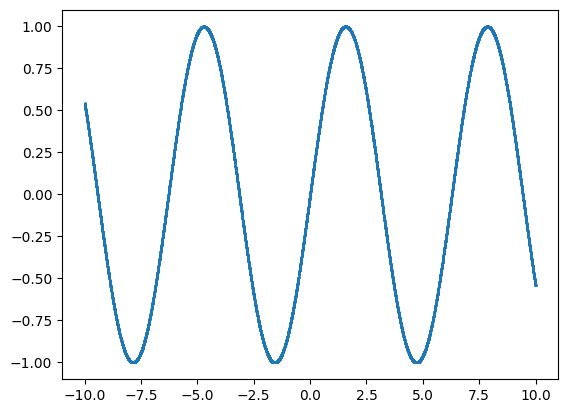

In [46]:
def generate_sine_data(x_min=-10, x_max=10, num_records=10000):
    
    x_vals = np.round(np.random.uniform(low=x_min, high=x_max, size=num_records), 4)
    y_vals = np.round(np.sin(x_vals), 4)
    
    x_y_sine_data = np.array([
       x_vals,
       y_vals 
    ]).T
    return x_y_sine_data

x_y_sine_data = generate_sine_data()
x_vals = x_y_sine_data[:, 0, np.newaxis]
y_vals = x_y_sine_data[:, 1, np.newaxis]
actual_sine_y_vals = y_vals.T

import matplotlib.pyplot as plt
plt.figure(1)
plt.scatter(x_vals, y_vals, s=1)
plt.show()

It'd be fun to see what our untrained network predicts for the x's from the above plot. Let's do it!

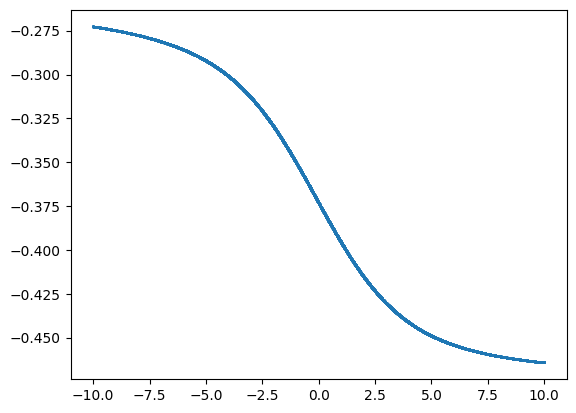

In [47]:
# since we going to be doing a 2d function,
# our input will be a 1d array - the X values
# our output will also be a 1d array - the Y Values

num_inputs = 1
hidden_layer_1_weight_matrix = np.random.uniform(low=-1, high=1, size=(num_nodes_hidden_layer_1, num_inputs + 1))

sine_x_vals = x_vals.T
layer_1_activations, layer_2_activations, sine_y_vals_projected = forward_prop(sine_x_vals, hidden_layer_1_weight_matrix, hidden_layer_2_weight_matrix, 
                 output_layer_weight_matrix)

plt.figure(2)
plt.scatter(x_vals, sine_y_vals_projected, s=1)
plt.show()

Not sine :)

## Back Propagation
#### As described by Andrew Ng:
##### 1. https://www.youtube.com/watch?v=x_Eamf8MHwU
##### 2. https://www.youtube.com/watch?v=cObOAIImeVQ

The backprop function should take in a list of (weight matrix, corresponding activations vector) pairs.  
It should return a list of updated weigth matrices. Let's see if we can pull it off.  
We won't follow best programming practices for the sake of better readability. We will explicitly pass all the weight matrices and activations, so the code is easier to follow.

rmse before backprop: 0.7990121364500055
Training and Learning in progress...
Iteration: 0, rmse: 0.7166194381416376


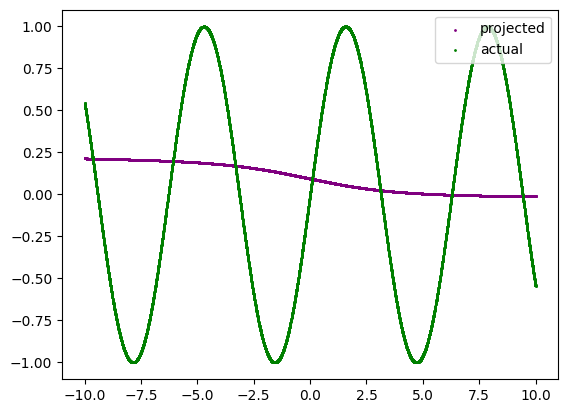

Training and Learning in progress...
Iteration: 5000, rmse: 0.6685202929237107


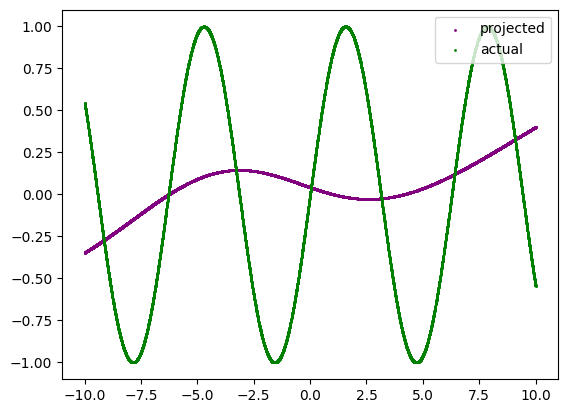

Training and Learning in progress...
Iteration: 10000, rmse: 0.31025183395368355


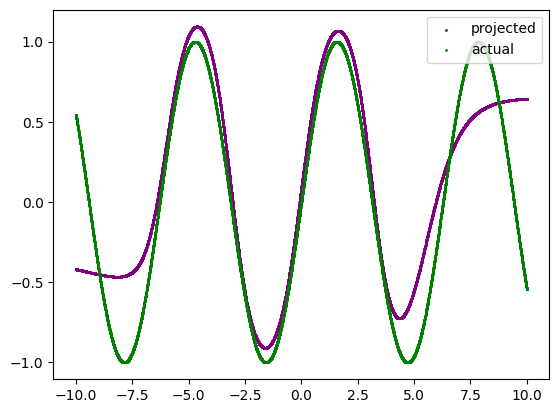

Training and Learning in progress...
Iteration: 15000, rmse: 0.23138815920801356


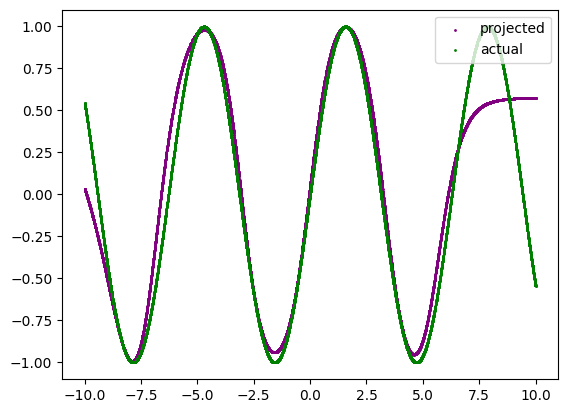

Training and Learning in progress...
Iteration: 20000, rmse: 0.2234713532321384


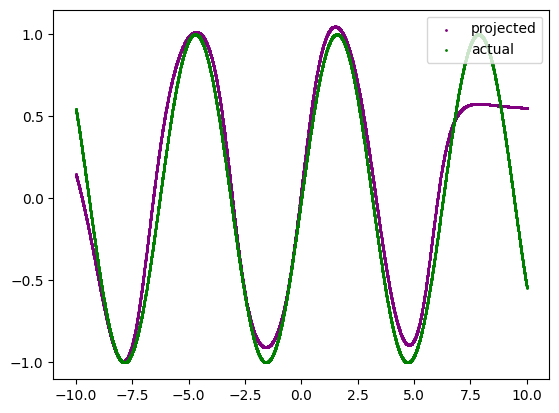

Training and Learning in progress...
Iteration: 25000, rmse: 0.21655837039749173


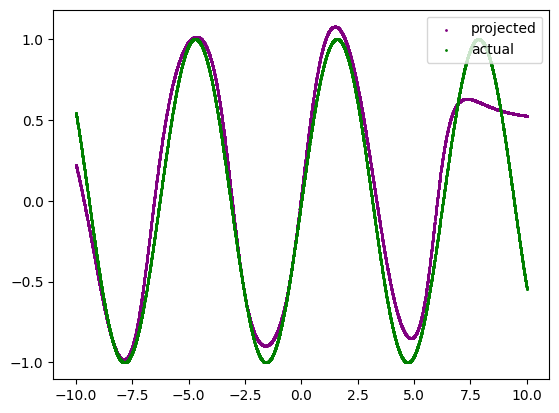

Training and Learning in progress...

Done!


In [48]:
def rmse(projected, actual):
    return np.sqrt(np.sum(np.square(projected - actual))/num_records)

def backprop(input_vector, layer_1_weight_matrix, layer_1_activations, layer_2_weight_matrix, layer_2_activations,
             output_layer_weight_matrix, output_vector, labels_vector, learning_rate=0.1):
    
    num_records = output_vector.shape[1]
    # This is using the naming convention from Andrew NG's lectures
    delta_4 = output_vector - labels_vector
    THETA_3_transpose_dot_delta_4 = np.dot(output_layer_weight_matrix.T, delta_4)
    
    g_prime_of_z_3 = layer_2_activations * (1 - layer_2_activations)
    
    BIG_DELTA_3 = np.dot(delta_4, layer_2_activations.T)
    # The following is Big D in NG's lecture
    OUTPUT_LAYER_GRADIENT = BIG_DELTA_3/num_records
    # print(f'OUTPUT_LAYER_GRADIENT.shape: {OUTPUT_LAYER_GRADIENT.shape}')
    # print(f'output_layer_weight_matrix.shape: {output_layer_weight_matrix.shape}')
    
    delta_3 = THETA_3_transpose_dot_delta_4 * g_prime_of_z_3
    
    # This is cosmetic and to do with this specific implementation:
    # Take out the delta of biases, so the dimensions match up - it should be zeros anyway
    delta_3 = delta_3[1:delta_3.shape[0], :]
    
    THETA_2_transpose_dot_delta_3 = np.dot(layer_2_weight_matrix.T, delta_3)
    
    g_prime_of_z_2 = layer_1_activations * (1 - layer_1_activations)
    
    BIG_DELTA_2 = np.dot(delta_3, layer_1_activations.T)
    # The following is Big D in NG's lecture
    LAYER_2_GRADIENT = BIG_DELTA_2/num_records
    # print(f'LAYER_2_GRADIENT.shape: {LAYER_2_GRADIENT.shape}')
    # print(f'layer_2_weight_matrix.shape: {layer_2_weight_matrix.shape}')
    
    
    delta_2 = THETA_2_transpose_dot_delta_3 * g_prime_of_z_2
    delta_2 = delta_2[1:delta_2.shape[0], :]
 
    BIG_DELTA_1 = np.dot(delta_2, input_vector.T)
    # The following is Big D in NG's lecture
    LAYER_1_GRADIENT = BIG_DELTA_1/num_records
    # print(f'LAYER_1_GRADIENT.shape: {LAYER_1_GRADIENT.shape}')
    # print(f'layer_1_weight_matrix.shape: {layer_1_weight_matrix.shape}')
    
    # Update weigts
    layer_1_weight_matrix -= learning_rate * LAYER_1_GRADIENT
    layer_2_weight_matrix -= learning_rate * LAYER_2_GRADIENT
    output_layer_weight_matrix -= learning_rate * OUTPUT_LAYER_GRADIENT
    
    return layer_1_weight_matrix, layer_2_weight_matrix, output_layer_weight_matrix

# Let's regenerate the data

x_y_sine_data = generate_sine_data(x_min=-10, x_max=10, num_records=10000)
x_vals = x_y_sine_data[:, 0, np.newaxis]
y_vals = x_y_sine_data[:, 1, np.newaxis]
sine_x_vals = x_vals.T
    
num_records = sine_x_vals.shape[1]
sine_x_vals_plus_bias = np.vstack([np.ones(num_records), sine_x_vals])
actual_sine_y_vals = y_vals.T

layer_1_activations, layer_2_activations, sine_y_vals_projected = forward_prop(sine_x_vals, hidden_layer_1_weight_matrix, hidden_layer_2_weight_matrix, 
                 output_layer_weight_matrix)

rmse_before_backprop = rmse(sine_y_vals_projected, actual_sine_y_vals)
print(f'rmse before backprop: {rmse_before_backprop}')

learning_rate=.55
figure_counter = 3

# this will run for a while
#num_iters = 300001

# just for illustration purposes we'd just run 25000 iters
# video with the progression of the function being learned throughout the full 300000 iters is attached at the end
num_iters = 25001

print("Training and Learning in progress...")
for i in range(num_iters):
    hidden_layer_1_weight_matrix, hidden_layer_2_weight_matrix, output_layer_weight_matrix = \
    backprop(sine_x_vals_plus_bias, hidden_layer_1_weight_matrix, layer_1_activations, 
                                           hidden_layer_2_weight_matrix, layer_2_activations, output_layer_weight_matrix, 
                                           sine_y_vals_projected, actual_sine_y_vals, learning_rate=learning_rate)

    layer_1_activations, layer_2_activations, sine_y_vals_projected = forward_prop(sine_x_vals, hidden_layer_1_weight_matrix, hidden_layer_2_weight_matrix, 
                     output_layer_weight_matrix)

    this_rmse = rmse(sine_y_vals_projected, actual_sine_y_vals)

    if i%5000 == 0:
        print(f'Iteration: {i}, rmse: {this_rmse}')
        plt.figure(figure_counter)
        figure_counter += 1
        plt.scatter(x_vals, sine_y_vals_projected, s=1, c='purple', label='projected')
        plt.scatter(x_vals, y_vals, s=1, c='green', label='actual')
        plt.legend(loc='upper right')
        plt.savefig('images/' + str(figure_counter) + '.png')
        plt.show()
        print("Training and Learning in progress...")
        

print()
print("Done!")
    

### Animation of the learning progression throughout 300000 iterations. A frame for each 5000 iterations:

In [49]:
%%html
<img src="images/train_progress.gif" width="750" align="center">

Not bad. With some expirementation over the amount of training data, the learning rate, the number of iterations, the number of layers, the number of neurons of each layer, the type of activation functions, we should be able to get it to fit almost perfectly.  
Now, let's generate some test data and see how we do.

test_rmse: 0.04385829646515177


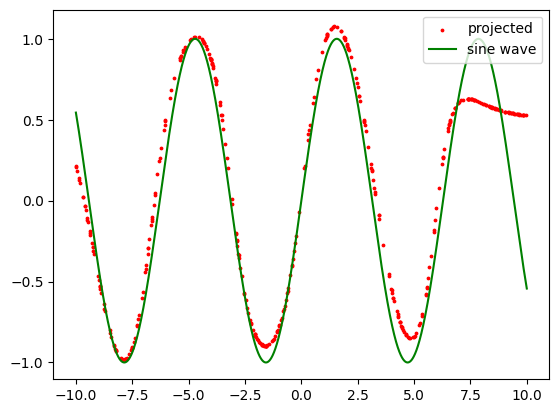

In [50]:
test_x_vals = np.random.uniform(low=-10, high=10, size=400)
test_y_vals = np.sin(test_x_vals)

test_x_vals = test_x_vals[:, np.newaxis].T
test_y_vals = test_y_vals[:, np.newaxis].T

_, _, projected_y_vals = forward_prop(test_x_vals, hidden_layer_1_weight_matrix, hidden_layer_2_weight_matrix, 
                 output_layer_weight_matrix)

test_rmse = rmse(test_y_vals, projected_y_vals)
print(f'test_rmse: {test_rmse}')

x_sine_wave = np.arange(-10, 10, 0.001)
y_sine_wave = np.sin(x_sine_wave)

plt.figure(figure_counter)
plt.scatter(test_x_vals, projected_y_vals, s=3, c='red', label='projected')
plt.plot(x_sine_wave, y_sine_wave, c='green', label='sine wave')
plt.legend(loc='upper right')
plt.show()


Not Bad. The goal of this notebook has been achieved. We have implemented a working backpropagation implementation.  
Yay!  
Here's the plot of testing with the weights learned after the full 300K iterations:

In [51]:
%%html
<img src="images/test.png" width="750" align="center">